# Exploring Neighbourhoods of Munich,Germany using Foursquare API & Openweathermap API

### Introduction

In the Year 2020, I am planned to relocate to Germany – Munich from Calicut – India. With this transition , it is required to understand the locality of Munich and its various Boroughs and subconsciously compare them with my Hometown of Calicut in India in terms of venues and weather conditions.

It would be beneficial and nice to have a platform which could make easy by considering a comparative analysis between the top 5 neighbourhoods and its comparison with Hometown of Calicut in India with provided factors.

<b>Munich</b> is the capital and most populous city of Bavaria the second most populous German State with a population of around 1.5 million, it is the third-largest city in Germany, after Berlin and Hamburg. Munich is is divided into <b> 25 </b> boroughs or Stadtbezirke. The primary language of communication is German.

<b>To explore this information, this project involves the usage of both the Foursquare API and the Openweathermap API </b>to fetch complete information of various venues (including name, address, category, weather, population estimates). Further, a map of the venues with specific color attributes will be plotted to highlight their position, and information about these venues. Such plots imbibe bountiful information in the form of their colored representations and location on the map. 


### Target/Interested Audience

•	Anyone who would be visiting or relocating to Munich in Germany

•	Anyone looking to expand their business or wants to setup a new business in Munich and confused in which Borough/Neighborhood is the best


### Data

To get location and other information about various venues in Munich, I used two APIs - Foursquare and Openweather map and decided to combine the data from both of them together.

The <b>Foursquare API </b>has a database of more than 105 million places. This project would use Four-square API as its prime data gathering source.Using the Foursquare’s explore API (which gives venues recommendations), I fetched venues up to a certain range from the center of Munich and collected their names,categories and locations (latitude and longitude).

HTTP requests would be made to this Foursquare API server using Borough names of the Munich city to pull the location information (Latitude and Longitude).Foursquare API search feature would be enabled to collect the nearby places of the neighborhoods. Due to http request limitations the number of places per neighborhood parameter would reasonably be set to <b>100</b> and the radius parameter would be set to <b>700</b>

Using the name, latitude and longitude values, I used the <b> Openweathermap search API </b>to fetch weather details from its database. This API allows to find the weather,humidity,wind details based on search criteria (usually the name),latitude and longitude values.

• <b>Folium </b>- Python visualization library would be used to visualize the neighborhoods cluster distribution of Munich city over an interactive leaflet map.Extensive comparative analysis of two randomly picked neighborhoods world be carried out to derive the desirable insights from the outcomes using python’s scientific libraries Pandas, NumPy and Scikit-learn.

• Unsupervised machine learning algorithm <b>K-mean clustering</b> would be applied to form the clusters of different categories of places residing in and around the neighborhoods. These clusters from each of those two chosen neighborhoods would be analyzed individually collectively and comparatively to derive the conclusions.

### Python Packages 

• Pandas - Library for Data Analysis  
• NumPy – Library to handle data in a vectorized manner  
• JSON – Library to handle JSON files   
• Geopy – To retrieve Location Data  
• Requests – Library to handle http requests  
• Matplotlib – Python Plotting Module   
• Sklearn – Python machine learning Library   
• Folium – Map rendering Library

### Start of Analysis / Execution

<h4> Calling the required Libraries </h4>

In [264]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<h4> A list of the 25 Boroughs of Munich are collected and stored in Borough_Munich.xlsx </h4>

In [19]:
df_Munich=pd.read_excel("Borough_Munich.xlsx")
df_Munich.head()

,Borough
0,Altstadt-Lehel
1,Ludwigsvorstadt-Isarvorstadt
2,Maxvorstadt
3,Schwabing-West
4,Au-Haidhausen


In [20]:
df_Munich.shape

(25, 1)

<h4> Obtaining the Geographical coordinates of Munich,Germany </h4>

In [14]:
address = 'Munich, Germany'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude  = location.longitude
print('The geograpical coordinate of Munich are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Munich are 48.1371079, 11.5753822.


<h4> Obtaining the Geographical Coordinates of the Boroughs in Munich </h4>

In [23]:
import requests
for i in range(len(df_Munich)):
    print(i)
    print(df_Munich.loc[i, "Borough"])
    address = '{},Germany'.format(df_Munich.loc[i, "Borough"])
    #print(address)
    location = geolocator.geocode(address)
    lat= location.latitude
    lng = location.longitude
    df_Munich.loc[i,"Latitude"]=lat
    df_Munich.loc[i,"Longitude"]=lng

0
Altstadt-Lehel
1
Ludwigsvorstadt-Isarvorstadt
2
Maxvorstadt
3
Schwabing-West
4
Au-Haidhausen
5
Sendling
6
Sendling-Westpark
7
Schwanthalerhöhe
8
Neuhausen-Nymphenburg
9
München-Moosach
10
Milbertshofen-Am Hart
11
Schwabing-Freimann
12
Bogenhausen
13
Berg am Laim
14
Trudering-Riem
15
Ramersdorf-Perlach
16
Obergiesing
17
Untergiesing-Harlaching
18
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln
19
Hadern
20
Pasing-Obermenzing
21
Aubing-Lochhausen-Langwied
22
Allach-Untermenzing
23
Feldmoching-Hasenbergl
24
Laim


In [24]:
df_Munich.head()

,Borough,Latitude,Longitude
0,Altstadt-Lehel,48.137828,11.574582
1,Ludwigsvorstadt-Isarvorstadt,48.131771,11.555809
2,Maxvorstadt,48.151092,11.562418
3,Schwabing-West,48.168271,11.569873
4,Au-Haidhausen,48.128753,11.590536


<h4> Using Folium Maps to visualise the Boroughs of Munich - Before Clustering</h4>

In [25]:
map_Munich=folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, nei in zip(df_Munich['Latitude'], df_Munich['Longitude'], df_Munich['Borough']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Munich)  

map_Munich

<h4> Connecting to the Foursquare API to obtain the neighboring venues around the Boroughs with Radius-700 Limit-100 </h4>

In [199]:
CLIENT_ID = '1MWT2UADIQ4AYQ2DMHQCEB2E30XRGJZ4Q2U4WTWCKCKGQZIF' # your Foursquare ID
CLIENT_SECRET = 'ALNDT0BEDR1KJGYYBYGC5HJ11DHQWMVC3I41YCRSA2EXG0MF' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1MWT2UADIQ4AYQ2DMHQCEB2E30XRGJZ4Q2U4WTWCKCKGQZIF
CLIENT_SECRET:ALNDT0BEDR1KJGYYBYGC5HJ11DHQWMVC3I41YCRSA2EXG0MF


In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
        CLIENT_SECRET, 
            VERSION,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
munich_venues = getNearbyVenues(names=df_Munich['Borough'],
                                   latitudes=df_Munich['Latitude'],
                                   longitudes=df_Munich['Longitude']
                                  )

In [30]:
munich_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Altstadt-Lehel,48.137828,11.574582,Marienplatz,48.137125,11.575483,Plaza
1,Altstadt-Lehel,48.137828,11.574582,Fischbrunnen,48.137211,11.576047,Fountain
2,Altstadt-Lehel,48.137828,11.574582,Alois Dallmayr,48.138554,11.576750,Gourmet Shop
3,Altstadt-Lehel,48.137828,11.574582,St. Peter,48.136530,11.575615,Church
4,Altstadt-Lehel,48.137828,11.574582,Hirmer,48.138023,11.572046,Men's Store


In [34]:
munich_venues.shape

(1086, 7)

In [35]:
munich_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allach-Untermenzing,13,13,13,13,13,13
Altstadt-Lehel,100,100,100,100,100,100
Au-Haidhausen,99,99,99,99,99,99
Aubing-Lochhausen-Langwied,11,11,11,11,11,11
Berg am Laim,20,20,20,20,20,20


In [36]:
print('There are {} uniques categories.'.format(len(munich_venues['Venue Category'].unique())))

There are 203 uniques categories.


In [37]:
# One hot encoding

munich_onehot = pd.get_dummies(munich_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
munich_onehot['Neighborhood'] = munich_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [munich_onehot.columns[-1]] + list(munich_onehot.columns[:-1])
munich_onehot = munich_onehot[fixed_columns]
munich_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Bathing Area,Bavarian Restaurant,Beach,Beach Bar,Beer Garden,Big Box Store,Bistro,Boarding House,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Stop,Business Service,Café,Camera Store,Candy Store,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Event Space,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Hill,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Laundromat,Laundry Service,Light Rail Station,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Modern Greek Restaurant,Motel,Motorcycle Shop,Movie Theater,Museum,Music School,Music Venue,Newsstand,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Post Office,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shipping Store,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tapas Restaurant,Taverna,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Tram Station,Trattoria/Osteria,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Altstadt-Lehel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Altstadt-Lehel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Altstadt-Lehel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [38]:
munich_grouped = munich_onehot.groupby('Neighborhood').mean().reset_index()
munich_grouped.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Bathing Area,Bavarian Restaurant,Beach,Beach Bar,Beer Garden,Big Box Store,Bistro,Boarding House,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Stop,Business Service,Café,Camera Store,Candy Store,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Event Space,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Hill,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Laundromat,Laundry Service,Light Rail Station,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Modern Greek Restaurant,Motel,Motorcycle Shop,Movie Theater,Museum,Music School,Music Venue,Newsstand,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Post Office,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shipping Store,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tapas Restaurant,Taverna,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Tram Station,Trattoria/Osteria,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Allach-Untermenzing,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.076923,0.0,0.0,0.0,0.076923,0.00,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.076923,0.0,0.00,0.0,0.000000,0.00,0.000000,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.000000,0.076923,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.076923,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.076923,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.076923,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.076923,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.000000,0.00,0.0,0.00,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.076923,0.000000,0.000000,0.0,0.076923,0.000000,0.0,0.0,0.0,0.0,0.00,0.076923,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0
1,Altstadt-Lehel,0.000000,0.0,0.0,0.0,0.01,0

<h4>Top 5 Venues against each Borough / Neighborhood </h4>

In [40]:
num_top_venues = 5
for hood in munich_grouped['Neighborhood'][:5]:
    print("----"+hood+"----")
    temp = munich_grouped[munich_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allach-Untermenzing----
                 venue  freq
0  Bavarian Restaurant  0.15
1   Italian Restaurant  0.08
2               Bakery  0.08
3                 Park  0.08
4            Gift Shop  0.08


----Altstadt-Lehel----
                 venue  freq
0                 Café  0.11
1    German Restaurant  0.07
2  Bavarian Restaurant  0.07
3                Plaza  0.06
4       Clothing Store  0.06


----Au-Haidhausen----
                venue  freq
0  Italian Restaurant  0.07
1                Café  0.05
2   Indian Restaurant  0.05
3               Plaza  0.05
4   French Restaurant  0.04


----Aubing-Lochhausen-Langwied----
               venue  freq
0       Soccer Field  0.18
1             Bakery  0.18
2           Bus Stop  0.09
3        Supermarket  0.09
4  German Restaurant  0.09


----Berg am Laim----
               venue  freq
0        Supermarket  0.15
1  German Restaurant  0.10
2   Asian Restaurant  0.10
3              Hotel  0.10
4               Bank  0.05




In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

<h4> Top 10 venues in each Borough/Neighborhood </h4>

In [42]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = munich_grouped['Neighborhood']

for ind in np.arange(munich_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(munich_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allach-Untermenzing,Bavarian Restaurant,Italian Restaurant,Gift Shop,Bakery,Supermarket,Trattoria/Osteria,Hardware Store,Tennis Court,Hotel,Drugstore
1,Altstadt-Lehel,Café,German Restaurant,Bavarian Restaurant,Plaza,Clothing Store,Hotel,Coffee Shop,Department Store,Church,Italian Restaurant
2,Au-Haidhausen,Italian Restaurant,Café,Indian Restaurant,Plaza,French Restaurant,Turkish Restaurant,Ice Cream Shop,Bakery,Restaurant,Science Museum
3,Aubing-Lochhausen-Langwied,Soccer Field,Bakery,Greek Restaurant,Hotel,Bus Stop,Supermarket,German Restaurant,Gym / Fitness Center,Light Rail Station,Zoo Exhibit
4,Berg am Laim,Supermarket,Hotel,German Restaurant,Asian Restaurant,Gastropub,Gym / Fitness Center,Bus Stop,Metro Station,Café,Bavarian Restaurant


<h3>K means Clustering of the Boroughs/Neighborhoods</h3>

In [43]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

<h4> Elbow Curve method to find the optimal number of Clusters to consider </h4>

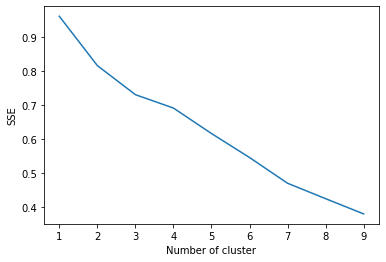

In [45]:
munich_grouped_clustering = munich_grouped.drop('Neighborhood', 1)
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(munich_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

<h4> Silhouette scores to understand the Optimal Cluster number </h4>

In [46]:
#Silhouette scores and cluster visualisations
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
import numpy as np

For 2  Clusters  the average silhouette_score is : 0.13089723076432971
For 3  Clusters  the average silhouette_score is : 0.14789425426519467
For 4  Clusters  the average silhouette_score is : 0.151529822277768
For 5  Clusters  the average silhouette_score is : 0.11116929248580534


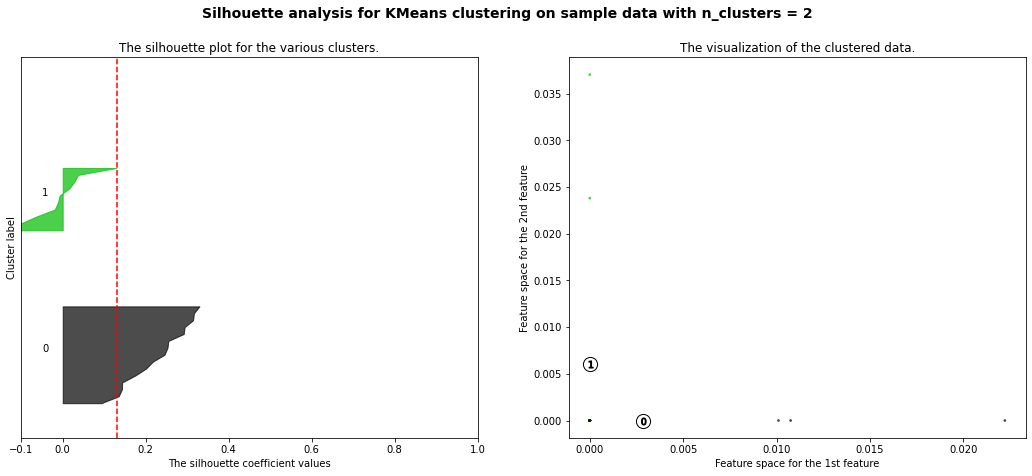

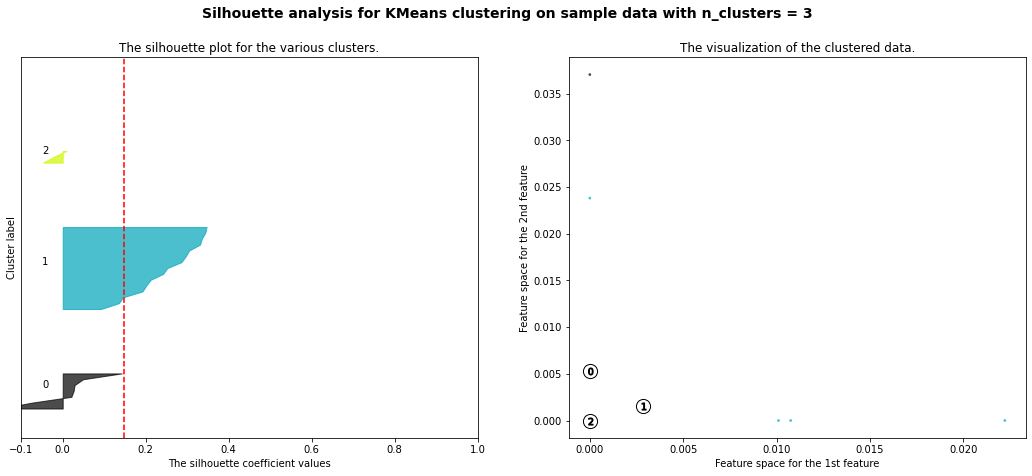

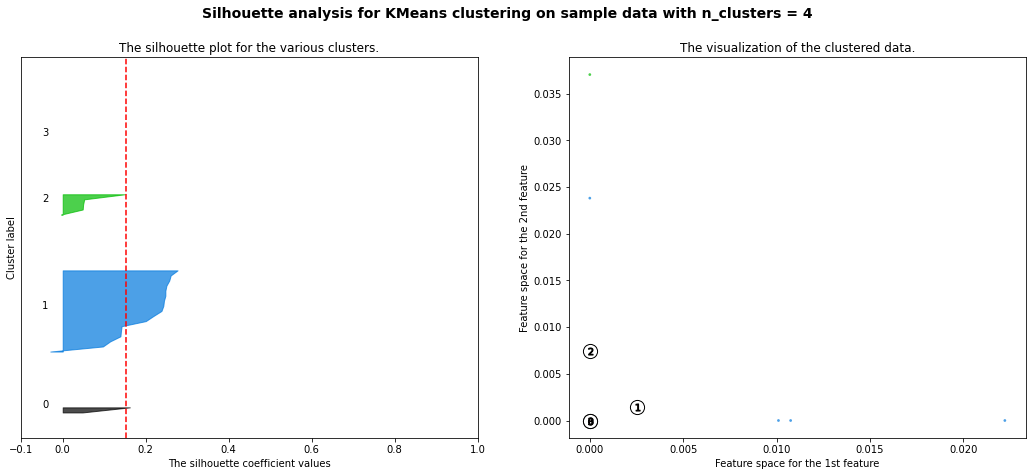

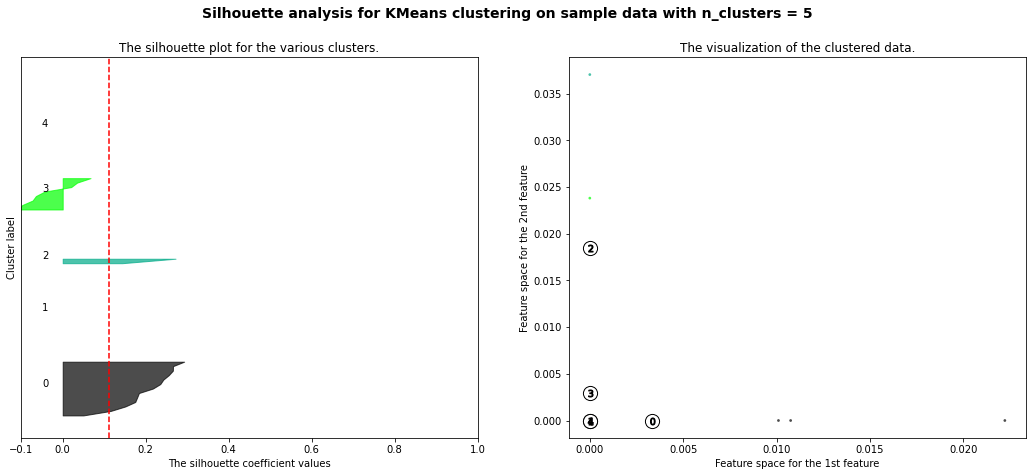

In [47]:
range_n_clusters=[2,3,4,5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(munich_grouped_clustering) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(munich_grouped_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(munich_grouped_clustering, cluster_labels)
    print("For", n_clusters, " Clusters  "
          "the average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(munich_grouped_clustering, cluster_labels)

    y_lower = 5
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color1 = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color1, edgecolor=color1, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors2 = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(munich_grouped_clustering.iloc[:, 0], munich_grouped_clustering.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors2, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Based on the above methods , we are opting for 4 Clusters 

In [67]:
kclusters = 4

munich_grouped_clustering = munich_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(munich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 2, 0, 1, 3, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 0, 1])

In [51]:
neighborhoods_venues_sorted.rename(columns={'Neighborhood':'Borough'},inplace=True)

In [68]:
#munich_merged.drop(['Cluster Labels'],axis=1,inplace=True)

In [69]:
munich_merged = df_Munich

# add clustering labels
munich_merged['Cluster Labels'] = kmeans.labels_

# merge chicago_grouped with chicago_data to add latitude/longitude for each neighborhood
munich_merged = munich_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')

munich_merged.head()

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altstadt-Lehel,48.137828,11.574582,1,Café,German Restaurant,Bavarian Restaurant,Plaza,Clothing Store,Hotel,Coffee Shop,Department Store,Church,Italian Restaurant
1,Ludwigsvorstadt-Isarvorstadt,48.131771,11.555809,1,Hotel,Italian Restaurant,Café,Supermarket,German Restaurant,Plaza,Grocery Store,Middle Eastern Restaurant,Bavarian Restaurant,Pizza Place
2,Maxvorstadt,48.151092,11.562418,1,Café,Asian Restaurant,History Museum,Art Museum,German Restaurant,Coffee Shop,Plaza,Steakhouse,Movie Theater,Sushi Restaurant
3,Schwabing-West,48.168271,11.569873,2,Italian Restaurant,Café,Vietnamese Restaurant,Supermarket,Japanese Restaurant,Plaza,Bar,Pizza Place,Park,Bus Stop
4,Au-Haidhausen,48.128753,11.590536,0,Italian Restaurant,Café,Indian Restaurant,Plaza,French Restaurant,Turkish Restaurant,Ice Cream Shop,Bakery,Restaurant,Science Museum


In [107]:
munich_merged.shape

(25, 14)

<h4> Visualizing the 4 Clusters </h4>

In [70]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

import matplotlib.colors as colors
# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []

for lat, lon, nei , cluster in zip(munich_merged['Latitude'], munich_merged['Longitude'], munich_merged['Borough'], munich_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#2adddd', '#d4dd80', '#ff0000']


In [78]:
munich_merged[munich_merged['Cluster Labels'] == 0].head(3)

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Au-Haidhausen,48.128753,11.590536,0,Italian Restaurant,Café,Indian Restaurant,Plaza,French Restaurant,Turkish Restaurant,Ice Cream Shop,Bakery,Restaurant,Science Museum
12,Bogenhausen,48.154782,11.633484,0,Italian Restaurant,Indian Restaurant,Water Park,Bus Stop,Supermarket,Greek Restaurant,Bank,Bakery,Drugstore,Eastern European Restaurant
23,Feldmoching-Hasenbergl,48.213804,11.541275,0,Bus Stop,Supermarket,Plaza,Bakery,Italian Restaurant,Greek Restaurant,Light Rail Station,Farmers Market,Club House,Bus Line


<b>Cluster 0 </b>: This is the poshest cluster in Munich and considered the most expensive and classy of Munich's numerous upscale residential districts. Bogenhausen is one of the districts with the lowest percentage of foreigners living in it. It is also home to some of the best and most beautiful beer gardens of the city

In [179]:
munich_merged[munich_merged['Cluster Labels'] == 1].head(4)

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altstadt-Lehel,48.137828,11.574582,1,Café,German Restaurant,Bavarian Restaurant,Plaza,Clothing Store,Hotel,Coffee Shop,Department Store,Church,Italian Restaurant
1,Ludwigsvorstadt-Isarvorstadt,48.131771,11.555809,1,Hotel,Italian Restaurant,Café,Supermarket,German Restaurant,Plaza,Grocery Store,Middle Eastern Restaurant,Bavarian Restaurant,Pizza Place
2,Maxvorstadt,48.151092,11.562418,1,Café,Asian Restaurant,History Museum,Art Museum,German Restaurant,Coffee Shop,Plaza,Steakhouse,Movie Theater,Sushi Restaurant
5,Sendling,48.118012,11.539083,1,Hotel,Supermarket,Café,Drugstore,German Restaurant,Gym,Gastropub,Italian Restaurant,Vietnamese Restaurant,Doner Restaurant


<b> Cluster 1 : </b>As observed, most of the cities landscapes (Museums,Churches) are located in Cluster 1 as well as the main shopping areas. Both the above Boroughs are located in the City central

In [76]:
munich_merged[munich_merged['Cluster Labels'] == 2].head(3)
#City center

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Schwabing-West,48.168271,11.569873,2,Italian Restaurant,Café,Vietnamese Restaurant,Supermarket,Japanese Restaurant,Plaza,Bar,Pizza Place,Park,Bus Stop


<b> Cluster 2: </b>Schwabing in Cluster 2 used to be known as Munich's bohemian quarter and remains popular with both tourists and locals, especially young people (Leopoldstrasse), for its numerous bars, clubs, and restaurants

In [77]:
munich_merged[munich_merged['Cluster Labels'] == 3].head(3)

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Sendling-Westpark,48.118031,11.519333,3,Bus Stop,Plaza,Tunnel,Park,Coffee Shop,Business Service,Brewery,Garden,Bakery,Gym / Fitness Center
7,Schwanthalerhöhe,48.133782,11.541057,3,Café,Hotel,Bar,German Restaurant,Ice Cream Shop,Italian Restaurant,Pizza Place,French Restaurant,Burger Joint,Indian Restaurant
21,Aubing-Lochhausen-Langwied,48.158437,11.414066,3,Soccer Field,Bakery,Greek Restaurant,Hotel,Bus Stop,Supermarket,German Restaurant,Gym / Fitness Center,Light Rail Station,Zoo Exhibit


<b> Cluster 3: </b>This cluster is more Affordable to live in. Munich’s district with the highest percentage of foreigners living in it,

In [79]:
new_munich=munich_merged.set_index("Borough",drop=True)
new_munich.head()

,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Altstadt-Lehel,48.137828,11.574582,1,Café,German Restaurant,Bavarian Restaurant,Plaza,Clothing Store,Hotel,Coffee Shop,Department Store,Church,Italian Restaurant
Ludwigsvorstadt-Isarvorstadt,48.131771,11.555809,1,Hotel,Italian Restaurant,Café,Supermarket,German Restaurant,Plaza,Grocery Store,Middle Eastern Restaurant,Bavarian Restaurant,Pizza Place
Maxvorstadt,48.151092,11.562418,1,Café,Asian Restaurant,History Museum,Art Museum,German Restaurant,Coffee Shop,Plaza,Steakhouse,Movie Theater,Sushi Restaurant
Schwabing-West,48.168271,11.569873,2,Italian Restaurant,Café,Vietnamese Restaurant,Supermarket,Japanese Restaurant,Plaza,Bar,Pizza Place,Park,Bus Stop
Au-Haidhausen,48.128753,11.590536,0,Italian Restaurant,Café,Indian Restaurant,Plaza,French Restaurant,Turkish Restaurant,Ice Cream Shop,Bakery,Restaurant,Science Museum


<h4> Extracting the Population of Munich | Borough Wise </h4>

In [82]:
borough_pop=pd.read_excel("Population_Munich.xlsx")
borough_pop.head()

,Borough,German,Others
0,Altstadt-Lehel,15600,5500
1,Ludwigsvorstadt-Isarvorstadt,36990,14654
2,Maxvorstadt,38351,13051
3,Schwabing-West,52999,15528
4,Au-Haidhausen,46910,14446


In [86]:
columnlist=list(borough_pop)

In [87]:
borough_pop["Total"]=borough_pop[columnlist].sum(axis=1)

In [88]:
borough_pop.head()

,Borough,German,Others,Total
0,Altstadt-Lehel,15600,5500,21100
1,Ludwigsvorstadt-Isarvorstadt,36990,14654,51644
2,Maxvorstadt,38351,13051,51402
3,Schwabing-West,52999,15528,68527
4,Au-Haidhausen,46910,14446,61356


In [91]:
borough_pop["%_of_Expats"]=round((borough_pop["Others"]/borough_pop["Total"])*100,2)

In [92]:
borough_pop.head()

,Borough,German,Others,Total,%_of_Expats
0,Altstadt-Lehel,15600,5500,21100,26.07
1,Ludwigsvorstadt-Isarvorstadt,36990,14654,51644,28.38
2,Maxvorstadt,38351,13051,51402,25.39
3,Schwabing-West,52999,15528,68527,22.66
4,Au-Haidhausen,46910,14446,61356,23.54


In [184]:
borough_pop.sort_values("%_of_Expats",ascending=False,inplace=True)

Visualizing the Expat Population and the Total Population in each Borough

In [185]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


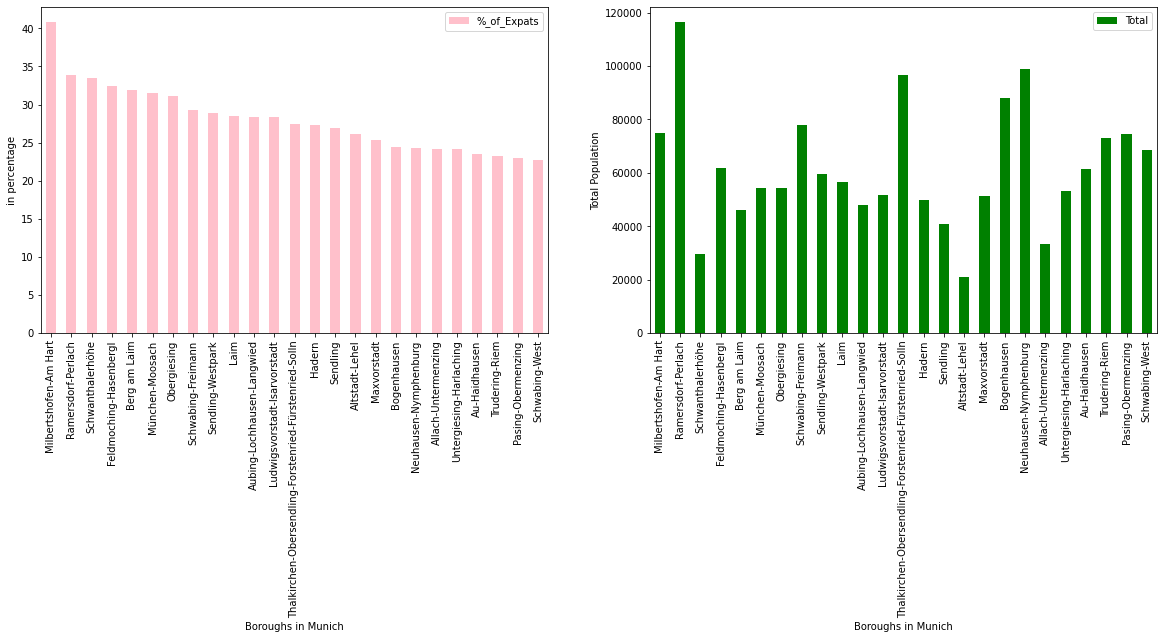

In [186]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 

borough_pop.plot.bar(x="Borough",y="%_of_Expats",color='pink',figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('')
ax0.set_xlabel('Boroughs in Munich')
ax0.set_ylabel('in percentage')

borough_pop.plot.bar(x="Borough",y="Total",color='green',figsize=(20, 6), ax=ax1) # add to subplot 1
ax1.set_title('')
ax1.set_xlabel('Boroughs in Munich')
ax1.set_ylabel('Total Population')

plt.show()


In [109]:
#borough_pop["Cluster"]=kmeans.labels_

In [112]:
#borough_pop.drop(["Cluster"],axis=1,inplace=True)

In [111]:
new_munich.head(2)

,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,
Altstadt-Lehel,48.137828,11.574582,1,Café,German Restaurant,Bavarian Restaurant,Plaza,Clothing Store,Hotel,Coffee Shop,Department Store,Church,Italian Restaurant
Ludwigsvorstadt-Isarvorstadt,48.131771,11.555809,1,Hotel,Italian Restaurant,Café,Supermarket,German Restaurant,Plaza,Grocery Store,Middle Eastern Restaurant,Bavarian Restaurant,Pizza Place


In [113]:
borough_pop.head()

,Borough,German,Others,Total,%_of_Expats
0,Altstadt-Lehel,15600,5500,21100,26.07
1,Ludwigsvorstadt-Isarvorstadt,36990,14654,51644,28.38
2,Maxvorstadt,38351,13051,51402,25.39
3,Schwabing-West,52999,15528,68527,22.66
4,Au-Haidhausen,46910,14446,61356,23.54


In [115]:
borough_pop_short=borough_pop
borough_pop_short

,Borough,German,Others,Total,%_of_Expats
0,Altstadt-Lehel,15600,5500,21100,26.07
1,Ludwigsvorstadt-Isarvorstadt,36990,14654,51644,28.38
2,Maxvorstadt,38351,13051,51402,25.39
3,Schwabing-West,52999,15528,68527,22.66
4,Au-Haidhausen,46910,14446,61356,23.54
5,Sendling,29971,11012,40983,26.87
6,Sendling-Westpark,42428,17215,59643,28.86
7,Schwanthalerhöhe,19775,9968,29743,33.51
8,Neuhausen-Nymphenburg,74834,23980,98814,24.27
9,München-Moosach,37151,17072,54223,31.48


In [121]:
#Merging two dataframes
combined=new_munich.merge(borough_pop_short,on="Borough")


In [123]:
combined.drop(['German','Others'],axis=1,inplace=True)

In [125]:
combined.rename(columns={'Total':'Total_Population'},inplace=True)

In [191]:
munich_merged.columns

Index(['Borough', 'Latitude', 'Longitude', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [188]:
#top5 bouroughs based on Expat or Foreigners Population
top5=borough_pop.head(5)
top5

,Borough,German,Others,Total,%_of_Expats
10,Milbertshofen-Am Hart,44473,30621,75094,40.78
15,Ramersdorf-Perlach,76902,39425,116327,33.89
7,Schwanthalerhöhe,19775,9968,29743,33.51
23,Feldmoching-Hasenbergl,41737,20037,61774,32.44
13,Berg am Laim,31396,14702,46098,31.89


In [193]:
raw=munich_merged[['Borough','Cluster Labels']]
top5=top5.merge(raw,on="Borough")
top5


,Borough,German,Others,Total,%_of_Expats,Cluster Labels
0,Milbertshofen-Am Hart,44473,30621,75094,40.78,1
1,Ramersdorf-Perlach,76902,39425,116327,33.89,1
2,Schwanthalerhöhe,19775,9968,29743,33.51,3
3,Feldmoching-Hasenbergl,41737,20037,61774,32.44,0
4,Berg am Laim,31396,14702,46098,31.89,1


In [157]:
#Sample of Temperature retrieval

# importing requests and json
import requests, json
# base URL
BASE_URL = "https://api.openweathermap.org/data/2.5/weather?"

# City Name
CITY = "Laim,Germany"
# API key 
API_KEY = "676035991ede98d2ccc4a3cc9bfcf0b9"

print("hello")

# upadting the URL
URL = BASE_URL + "q=" + CITY + "&appid=" + API_KEY

#URL='http://api.openweathermap.org/data/2.5/weather?q=Hyderabad&APPID=676035991ede98d2ccc4a3cc9bfcf0b9'
print(URL)
# HTTP request
response = requests.get(URL)
print(response)
# checking the status code of the request

if response.status_code == 200:
    data = response.json()
    print(data)
   # getting the main dict block
    main = data['main']
   # getting temperature
    temperature = main['temp']
    toCelcius=round(temperature-273.15,2)
   # getting the humidity
    humidity = main['humidity']
   # getting the pressure
    pressure = main['pressure']
   # weather report
    report = data['weather']
    print(f"{CITY:-^30}")
    print(f"Temperature(Celcius): {toCelcius}")
    print(f"Humidity: {humidity}")
    print(f"Pressure: {pressure}")
    print(f"Weather Report: {report[0]['description']}")
#else:
   # showing the error message
 #  print("Error in the HTTP request")

hello
https://api.openweathermap.org/data/2.5/weather?q=Laim,Germany&appid=676035991ede98d2ccc4a3cc9bfcf0b9
<Response [200]>
{'coord': {'lon': 11.5, 'lat': 48.14}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 290.44, 'feels_like': 290.27, 'temp_min': 289.15, 'temp_max': 291.48, 'pressure': 1016, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 220}, 'rain': {'1h': 3.5}, 'clouds': {'all': 100}, 'dt': 1595747211, 'sys': {'type': 1, 'id': 1307, 'country': 'DE', 'sunrise': 1595734942, 'sunset': 1595789904}, 'timezone': 7200, 'id': 2867714, 'name': 'Laim', 'cod': 200}
---------Laim,Germany---------
Temperature(Celcius): 17.29
Humidity: 87
Pressure: 1016
Weather Report: moderate rain


In [160]:
df_Temp=df_Munich
df_Temp.columns

Index(['Borough', 'Latitude', 'Longitude', 'Cluster Labels'], dtype='object')

In [161]:
df_Temp.drop(['Latitude','Longitude','Cluster Labels'],axis=1,inplace=True)

<h3> Openweathermap API </h3>

In [164]:
import requests, json

for city in df_Temp['Borough']:
    print(city)
    BASE_URL = "https://api.openweathermap.org/data/2.5/weather?"
    CITY = "{},Germany".format(city)
    API_KEY = "676035991ede98d2ccc4a3cc9bfcf0b9"
    URL = BASE_URL + "q=" + CITY + "&appid=" + API_KEY
    response = requests.get(URL)
    # checking the status code of the request

    if response.status_code == 200:
        data = response.json()
        main = data['main']
        temperature = main['temp']
        toCelcius=round(temperature-273.15,2)
        df_Temp["Temp(Celcius)"]=toCelcius

Altstadt-Lehel
Ludwigsvorstadt-Isarvorstadt
Maxvorstadt
Schwabing-West
Au-Haidhausen
Sendling
Sendling-Westpark
Schwanthalerhöhe
Neuhausen-Nymphenburg
München-Moosach
Milbertshofen-Am Hart
Schwabing-Freimann
Bogenhausen
Berg am Laim
Trudering-Riem
Ramersdorf-Perlach
Obergiesing
Untergiesing-Harlaching
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln
Hadern
Pasing-Obermenzing
Aubing-Lochhausen-Langwied
Allach-Untermenzing
Feldmoching-Hasenbergl
Laim


In [166]:
df_Temp.head(2)

,Borough,Temp(Celcius)
0,Altstadt-Lehel,17.15
1,Ludwigsvorstadt-Isarvorstadt,17.15


In [167]:
combined=combined.merge(df_Temp,on="Borough")

In [169]:
combined=combined.set_index("Borough",drop=True)
combined.head(2)

,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Total_Population,%_of_Expats,Temp(Celcius)
Borough,,,,,,,,,,,,,,,,
Altstadt-Lehel,48.137828,11.574582,1,Café,German Restaurant,Bavarian Restaurant,Plaza,Clothing Store,Hotel,Coffee Shop,Department Store,Church,Italian Restaurant,21100,26.07,17.15
Ludwigsvorstadt-Isarvorstadt,48.131771,11.555809,1,Hotel,Italian Restaurant,Café,Supermarket,German Restaurant,Plaza,Grocery Store,Middle Eastern Restaurant,Bavarian Restaurant,Pizza Place,51644,28.38,17.15


In [194]:
# Top 5 Boroughs based on the % of Expats -- Criteria for me that I chose
top5

,Borough,German,Others,Total,%_of_Expats,Cluster Labels
0,Milbertshofen-Am Hart,44473,30621,75094,40.78,1
1,Ramersdorf-Perlach,76902,39425,116327,33.89,1
2,Schwanthalerhöhe,19775,9968,29743,33.51,3
3,Feldmoching-Hasenbergl,41737,20037,61774,32.44,0
4,Berg am Laim,31396,14702,46098,31.89,1


<h4> Comparison of the Neighborhoods from the Top 5 </h4>

In [195]:
Input1=input("Enter the Neighborhood: ")

Enter the Neighborhood: Berg am Laim


In [196]:
Input2=input("Enter the Neighborhood: ")

Enter the Neighborhood: Schwanthalerhöhe


In [197]:
Venue_comparison=combined.loc[[Input1,Input2]].T
Venue_comparison

Borough,Berg am Laim,Schwanthalerhöhe
Latitude,48.1235,48.1338
Longitude,11.6335,11.5411
Cluster Labels,1,3
1st Most Common Venue,Supermarket,Café
2nd Most Common Venue,Hotel,Hotel
3rd Most Common Venue,German Restaurant,Bar
4th Most Common Venue,Asian Restaurant,German Restaurant
5th Most Common Venue,Gastropub,Ice Cream Shop
6th Most Common Venue,Gym / Fitness Center,Italian Restaurant
7th Most Common Venue,Bus Stop,Pizza Place


Now that I got the details of the Boroughs of Munich , I wish to compare it with my Hometown of Calicut in India 

In [212]:
def getNearbyVenues_Calicut(name,lat,lng,radius=500):
    venues_list=[]
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
        CLIENT_SECRET, 
            VERSION,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
    venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
    venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues_calicut = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues_calicut.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_calicut)

In [213]:
#to compare current residence in India
Calicut_venues = getNearbyVenues_Calicut(name='Calicut',lat=11.2588,lng=75.7804)

In [214]:
Calicut_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Calicut,11.2588,75.7804,Hotel Top Form,11.258896,75.782084,Indian Restaurant
1,Calicut,11.2588,75.7804,Paragon Restaurant,11.256669,75.778631,Indian Restaurant
2,Calicut,11.2588,75.7804,Kairali Theatre,11.258769,75.782595,Movie Theater
3,Calicut,11.2588,75.7804,Hotel Sagar,11.258953,75.781811,Indian Restaurant
4,Calicut,11.2588,75.7804,Dakshin,11.258723,75.781236,Vegetarian / Vegan Restaurant
5,Calicut,11.2588,75.7804,Domino's Pizza,11.258820,75.780402,Pizza Place
6,Calicut,11.2588,75.7804,Amoeba Focus Mall,11.254941,75.779813,Bowling Alley
7,Calicut,11.2588,75.7804,Garlic Routes,11.259890,75.776654,Fast Food Restaurant
8,Calicut,11.2588,75.7804,KFC,11.259726,75.780467,Fast Food Restaurant
9,Calicut,11.2588,75.7804,Marina Residency,11.260537,75.777889,Hotel


In [215]:
# One hot encoding

Calicut_onehot = pd.get_dummies(Calicut_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Calicut_onehot['Neighborhood'] = Calicut_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Calicut_onehot.columns[-1]] + list(Calicut_onehot.columns[:-1])
Calicut_onehot = Calicut_onehot[fixed_columns]
Calicut_onehot.head()

,Neighborhood,Bowling Alley,Clothing Store,Fast Food Restaurant,Hotel,Indian Restaurant,Juice Bar,Movie Theater,Pizza Place,South Indian Restaurant,Vegetarian / Vegan Restaurant
0,Calicut,0,0,0,0,1,0,0,0,0,0
1,Calicut,0,0,0,0,1,0,0,0,0,0
2,Calicut,0,0,0,0,0,0,1,0,0,0
3,Calicut,0,0,0,0,1,0,0,0,0,0
4,Calicut,0,0,0,0,0,0,0,0,0,1


In [216]:
Calicut_grouped = Calicut_onehot.groupby('Neighborhood').mean().reset_index()
Calicut_grouped.head()

,Neighborhood,Bowling Alley,Clothing Store,Fast Food Restaurant,Hotel,Indian Restaurant,Juice Bar,Movie Theater,Pizza Place,South Indian Restaurant,Vegetarian / Vegan Restaurant
0,Calicut,0.066667,0.133333,0.133333,0.133333,0.2,0.066667,0.066667,0.066667,0.066667,0.066667


In [217]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Calicut_venues_sorted = pd.DataFrame(columns=columns)
Calicut_venues_sorted['Neighborhood'] = Calicut_grouped['Neighborhood']

for ind in np.arange(Calicut_grouped.shape[0]):
    Calicut_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Calicut_grouped.iloc[ind, :], num_top_venues)

Calicut_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Calicut,Indian Restaurant,Hotel,Fast Food Restaurant,Clothing Store,Vegetarian / Vegan Restaurant,South Indian Restaurant,Pizza Place,Movie Theater,Juice Bar,Bowling Alley


In [219]:
Calicut=Calicut_venues_sorted.set_index("Neighborhood",drop=True)
Calicut

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,
Calicut,Indian Restaurant,Hotel,Fast Food Restaurant,Clothing Store,Vegetarian / Vegan Restaurant,South Indian Restaurant,Pizza Place,Movie Theater,Juice Bar,Bowling Alley


In [223]:
BASE_URL = "https://api.openweathermap.org/data/2.5/weather?"
CITY = "Calicut,India"
API_KEY = "676035991ede98d2ccc4a3cc9bfcf0b9"
URL = BASE_URL + "q=" + CITY + "&appid=" + API_KEY
response = requests.get(URL)
    # checking the status code of the request

if response.status_code == 200:
    data = response.json()
    main = data['main']
    temperature = main['temp']
    toCelcius=round(temperature-273.15,2)
    Calicut["Temp(Celcius)"]=toCelcius

In [224]:
Calicut

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Temp(Celcius)
Neighborhood,,,,,,,,,,,
Calicut,Indian Restaurant,Hotel,Fast Food Restaurant,Clothing Store,Vegetarian / Vegan Restaurant,South Indian Restaurant,Pizza Place,Movie Theater,Juice Bar,Bowling Alley,29.0


In [259]:
combined= combined.append(Calicut)
combined

,%_of_Expats,10th Most Common Venue,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,Cluster Labels,Latitude,Longitude,Temp(Celcius),Total_Population
Altstadt-Lehel,26.07,Italian Restaurant,Café,German Restaurant,Bavarian Restaurant,Plaza,Clothing Store,Hotel,Coffee Shop,Department Store,Church,1.0,48.137828,11.574582,17.15,21100.0
Ludwigsvorstadt-Isarvorstadt,28.38,Pizza Place,Hotel,Italian Restaurant,Café,Supermarket,German Restaurant,Plaza,Grocery Store,Middle Eastern Restaurant,Bavarian Restaurant,1.0,48.131771,11.555809,17.15,51644.0
Maxvorstadt,25.39,Sushi Restaurant,Café,Asian Restaurant,History Museum,Art Museum,German Restaurant,Coffee Shop,Plaza,Steakhouse,Movie Theater,1.0,48.151092,11.562418,17.15,51402.0
Schwabing-West,22.66,Bus Stop,Italian Restaurant,Café,Vietnamese Restaurant,Supermarket,Japanese Restaurant,Plaza,Bar,Pizza Place,Park,2.0,48.168271,11.569873,17.15,68527.0
Au-Haidhausen,23.54,Science Museum,Italian Restaurant,Café,Indian Restaurant,Plaza,French Restaurant,Turkish Restaurant,Ice Cream Shop,Bakery,Restaurant,0.0,48.128753,11.590536,17.15,61356.0
Sendling,26.87,Doner Restaurant,Hotel,Supermarket,Café,Drugstore,German Restaurant,Gym,Gastropub,Italian Restaurant,Vietnamese Restaurant,1.0,48.118012,11.539083,17.15,40983.0
Sendling-Westpark,28.86,Gym / Fitness Center,Bus Stop,Plaza,Tunnel,Park,Coffee Shop,Business Service,Brewery,Garden,Bakery,3.0,48.118031,11.519333,17.15,59643.0
Schwanthalerhöhe,33.51,Indian Restaurant,Café,Hotel,Bar,German Restaurant,Ice Cream Shop,Italian Restaurant,Pizza Place,French Restaurant,Burger Joint,3.0,48.133782,11.541057,17.15,29743.0
Neuhausen-Nymphenburg,24.27,Vietnamese Restaurant,Italian Restaurant,Café,Bakery,Indian Restaurant,Plaza,Pizza Place,Ice Cream Shop,Greek Restaurant,German Restaurant,1.0,48.154222,11.531517,17.15,98814.0
München-Moosach,31.48,Light Rail Station,Bakery,Supermarket,Drugstore,Hotel,Tram Station,Shopping Mall,Motel,Sandwich Place,Gas Station,1.0,48.180166,11.506122,17.15,54223.0


<h3> Comparison of the Neighborhoods in Munich of choice with Calicut </h3>

In [226]:
#Now comparing the Neighborhoods in Munich Germany VS Neighborhoods in Calicut India
Input1=input("Enter the Neighborhood: ")

Enter the Neighborhood: Laim


In [261]:
Input2=input("Enter the Neighborhood: ")

Enter the Neighborhood: Schwanthalerhöhe


In [262]:
Venue_comparison_2=combined.loc[[Input1,Input2,"Calicut"]].T
Venue_comparison_2

,Laim,Schwanthalerhöhe,Calicut
%_of_Expats,28.47,33.51,NaN
10th Most Common Venue,Motel,Indian Restaurant,Bowling Alley
1st Most Common Venue,Supermarket,Café,Indian Restaurant
2nd Most Common Venue,Italian Restaurant,Hotel,Hotel
3rd Most Common Venue,Doner Restaurant,Bar,Fast Food Restaurant
4th Most Common Venue,Bank,German Restaurant,Clothing Store
5th Most Common Venue,Bakery,Ice Cream Shop,Vegetarian / Vegan Restaurant
6th Most Common Venue,Park,Italian Restaurant,South Indian Restaurant
7th Most Common Venue,Tram Station,Pizza Place,Pizza Place
8th Most Common Venue,Restaurant,French Restaurant,Movie Theater


Since Calicut is entirely of Indian population , it shows NaN in the Expat % . You can see the top 10 Venues of the Neighborhoods as well as the Temperature difference and Population count. This will enable the user / me to make a consious decision on where to relocate / help a user(who has presence in Calicut) where to setup business in Munich in Germany

### Thank you